# ETRA Challenge Report

## Introduction

In ETRA Challenge, 8 subjects were tested on various tasks including visual fixation, visual search and visual exploration. 
Multiple stimuli were presented, such as, natural images, blank scenes or images from "Where is Waldo" book.
We came up with two, which we want to test:

1. There will be difference in eye movement trajectories between variants `Fixation` and `FreeViewing` in the task type `Blank`.
2. There will be difference in pupil size based on the task and it will also depend on the time elapsed since the start of the experiment.


## Data Format

The dataset is downloaded into directory `data/` which contains:

* `data/` - Directory containing subdirectories with data of each participant stored in CSV files representing each trial. Each file contains 45 seconds of eye tracker data.
* `images/` - Contains the pictures shown during the experiment.
* `DataSummary.csv` - Each row in the file contains info about the clicks of the given participant during the trial. 

Description of the dataset is on the page [ETRA dataset description](https://etra.acm.org/2019/challenge.html).

# Setup

Following part sets up the enviroment to properly run the experiment.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

# Apply the default theme
sns.set_theme()

In [2]:
%matplotlib inline
# should enable plotting without explicit call .show()

%load_ext pretty_jupyter

In [3]:
# Load the dataset using the prepared module `etra.py`.

from etra import ETRA

dataset = ETRA()

Dataset etra already downloaded.
Unpacking etra...


## Load Data

Following part defines function which easily loads specified data from the dataset based on the `subject`, `fv_fixation` and `task_type` parameters.

In [4]:
from etra import read_data

def load_data(
        subject="*",
        fv_fixation="*",
        task_type="*",
    ):
    """
    Loads selected data and sorts them by the time.
    """
    
    selected_files = (dataset.data_dir / "data").glob(f"{subject}/*_{fv_fixation}_{task_type}_*.csv")

    return pd.concat((read_data(f) for f in selected_files)).sort_values(by="Time")

### Examples: 

In [5]:
# Load participant `009`, `Fixation` task and type `Waldo`.
df_009_fix_waldo = load_data(
        subject="009",
        fv_fixation="Fixation",
        task_type="Waldo",
    )

In [6]:
df_009_fix_waldo.head()

,participant_id,trial_id,fv_fixation,task_type,stimulus_id,Time,LXpix,LYpix,RXpix,RYpix,LXhref,LYhref,RXhref,RYhref,LP,RP
0,009,016,Fixation,Waldo,wal014,1614108,473.22,317.625,468.18,314.700,-802.0,2960.0,-858.0,2931.0,722,903
1,009,016,Fixation,Waldo,wal014,1614110,473.30,317.775,467.78,314.775,-801.0,2962.0,-862.0,2932.0,720,904
2,009,016,Fixation,Waldo,wal014,1614112,473.38,317.925,467.46,314.925,-800.0,2963.0,-866.0,2934.0,718,905
3,009,016,Fixation,Waldo,wal014,1614114,473.30,319.125,465.14,315.750,-800.0,2977.0,-889.0,2945.0,720,910
4,009,016,Fixation,Waldo,wal014,1614116,474.82,317.550,465.46,316.800,-785.0,2958.0,-886.0,2957.0,723,908


In [7]:
# Load `Waldo` data from all the participants and both `Fixation` and `FreeViewing`.
df_waldo = load_data(        
        task_type="Waldo",
    )

In [8]:
df_waldo.head()

,participant_id,trial_id,fv_fixation,task_type,stimulus_id,Time,LXpix,LYpix,RXpix,RYpix,LXhref,LYhref,RXhref,RYhref,LP,RP
0,062,001,Fixation,Waldo,wal002,262296,461.70,297.375,467.62,299.550,-1418.0,3197.0,-1353.0,3218.0,744,962
1,062,001,Fixation,Waldo,wal002,262298,462.58,298.875,469.06,300.825,-1425.0,3197.0,-1354.0,3216.0,744,963
2,062,001,Fixation,Waldo,wal002,262300,463.22,298.650,468.98,301.125,-1418.0,3194.0,-1355.0,3220.0,746,961
3,062,001,Fixation,Waldo,wal002,262302,463.22,299.400,469.46,301.050,-1418.0,3203.0,-1350.0,3219.0,747,961
4,062,001,Fixation,Waldo,wal002,262304,462.58,299.250,469.30,302.025,-1425.0,3201.0,-1352.0,3230.0,747,962


# Hypotheses

Following part describes the hypotheses and its testing.

## Hypothesis 1: 
### "There will be difference in eye movement trajectories between variants `Fixation` and `FreeViewing` in the task type `Blank`."

During the task `Fixation` participants must keep their focus on the fixed point of the screen. 
On the other hand during `FreeViewing` task they are able to move their eyes in any direction. 
We expect that the trajectory of the eye movement will differ in the puzzle task types (`Puzzle` and `Waldo`), 
because it would be imposible to solve the puzzle without moving the eyes (for `FreeViewing` part).
We also expect that the participant would discover the picture in the task type `Natural` and the trajectories would differ too.

The interesting example could be the task type `Blank`. In this task there is nothing in the picture just blank picture.
The participant during the `FreeViewing` task could either stare on the fixed point of the picture which would lead 
to same trajectories as in the `Fixation` tasks or randomly fluctuate their focus on the picture.
This idea is the main motivation to test the hypothesis above.


(Note: The original hypothesis was that the trajectories would differ in the tasks `Puzzle` and `Waldo`. 
However, the hypothesis was based on the wrong understanding of the task `Fixation` for the types `Puzzle` and `Waldo` 
and it does not make much sense to test this hypothesis now (it would almost certaily lead into the difference of the trajectories.
This is the reason why we decided to change to hypothesis to the one described above.)

### Data Preparation

For this experiment, we restricted only on the data of the task type `Blank` from the arbitrary choosen participant `009`. We have choosen only one arbitrary participant, because of the selected statistical tests which assume independent variables. This condition will not be fulfilled for the multiple participants.  
Then we used the following columns (names of the columns are renamed variants of the names from the original table (original names could be found below):
* `time` - Time in milliseconds from the begining of the trial (normalized from the absolute values to relative (starts from 0).
* `fv_fixation` - Indicator of either `FreeViewing` or `Fixation` task.
* `trial` - ID of the trial
* `x`, `y` - Coordinates of the left eye focus. In order to simplify the testing we have decided to study only left eye trajectory, because we expect that the trajectories of the left and right eye are similar.

In the following blocks of code we provide example of the described data preparation.

In [9]:
# Extraction of the data from the participant with ID `009` for the `Blank` task type.
hyp1_var = load_data(subject="009", task_type="Blank")

In [10]:
# Display first rows of the extracted data.
hyp1_var.head()

,participant_id,trial_id,fv_fixation,task_type,stimulus_id,Time,LXpix,LYpix,RXpix,RYpix,LXhref,LYhref,RXhref,RYhref,LP,RP
0,009,004,FreeViewing,Blank,grey,524232,533.22,245.775,523.70,235.050,566.0,521.0,454.0,413.0,823,964
1,009,004,FreeViewing,Blank,grey,524234,533.94,246.300,523.38,233.925,573.0,525.0,449.0,401.0,820,973
2,009,004,FreeViewing,Blank,grey,524236,531.94,247.200,521.78,233.475,553.0,538.0,432.0,398.0,823,964
3,009,004,FreeViewing,Blank,grey,524238,533.30,246.600,523.38,238.650,566.0,530.0,454.0,452.0,824,977
4,009,004,FreeViewing,Blank,grey,524240,532.02,247.575,524.34,238.725,554.0,542.0,464.0,452.0,823,977


In [11]:
# Rename the parameters for the future usage.
hyp1_var = hyp1_var\
    .rename(
        {
            "Time": "time",
            "trial_id": "trial",
            "fv_fixation" : "fv_fixation",
            "LXpix": "x", 
            "LYpix": "y",
        },
        axis = 1
    )

# Drop the redundant parameters.
hyp1_var = hyp1_var\
    [
        [
            "time",
            "trial",
            "fv_fixation",
            "x",
            "y",
        ]
    ]

# Time normalization (to start from 0).
hyp1_var["time"] = hyp1_var.groupby(["trial"])["time"].transform(lambda x: x - x.min())

#### Distance Computation

Next step of the pre-processing was to reduce the amount of data in each trial. We divided the data into intervals of 10 following measurements and computed the mean of the coordinates (columns `x` and `y`). In most cases it should be 20 ms intervals of the trial (measurements are typicaly separated by 2 ms). The computation of the mean should also filter random fluctuations of the eye movement data caused by inaccurate measurement. Then, we computed the distance between each pair of the consecutive interval means from the trial. This information describes the movement of the eye focus in the specific time interval and we used it to test the first hypothesis. Finally, we remove the abundand columns.

The described preprocessing could be seen in the following code blocks.

In [12]:
def create_interval_means(
        data : pd.DataFrame,
        x_col="x",
        y_col="y",
        interval_size=10,
    ):
    """
    Creates new table of means of coordinates for intervals of size `interval_size`.
    """
    
    num_rows = data.shape[0]
    datas = []

    for start_point in range(0, num_rows, interval_size):
        slice_data = data.loc[start_point:min(start_point + interval_size, num_rows - 1), ("x", "y")]
        if not slice_data.empty:
            interval_means = slice_data.mean()
            datas.append(interval_means)
    
    return pd.DataFrame(datas)

In [13]:
def compute_distance(
        data : pd.DataFrame,
        x_col="x",
        y_col="y",
        dist_name="distance",
    ):
    """
    Computes distance between each pair of the consecutive coordinates.
    """

    # Compute distance between consecutive pairs of points.
    data[dist_name] = np.sqrt((data[x_col] - data[x_col].shift())**2 + (data[y_col] - data[y_col].shift())**2)

    # Remove the first row, which has a NaN value for distance.
    return data.dropna()

In [14]:
# Compute means of the coordinates for each trial in fixed time intervals. Then compute distance between each pair of the consecutive coordinate means.
hyp1_var_avg_x_y = hyp1_var\
    .groupby(["trial", "fv_fixation"])\
    .apply(create_interval_means)\
    .reset_index()\
    .groupby(["trial", "fv_fixation"])\
    .apply(compute_distance)\
    .reset_index(drop=True)\
    .groupby(["trial", "fv_fixation"])\
    .agg(avg_distance=("distance", np.mean))\
    .reset_index()\
    .drop("trial", axis=1)

In [15]:
# Show the prepared data for hypothesis testing.
hyp1_var_avg_x_y.head()

,fv_fixation,avg_distance
0,FreeViewing,5.826678
1,Fixation,1.375381
2,FreeViewing,7.560105
3,Fixation,1.690413
4,FreeViewing,9.837648


### Hypothesis testing

We have to formally define the null and alternative hypothesis to test. State meansof trajectory differences for `FreeViewing` $\mu_0$ and `Fixation` $\mu_1$ for `Blank` task type.

$H_0$ (null hypothesis): $\mu_0 = \mu_1$

$H_1$ (alternative hypothesis): $\mu_0 \neq \mu_1$

We compute the summary statistics for average traveled distance for both `FreeViewing` and `Fixation` tasks. 

In [16]:
hyp1_var_avg_x_y.groupby("fv_fixation").describe().round(decimals=2)

avg_distance                                          
                   count  mean   std   min   25%   50%   75%   max
fv_fixation                                                       
Fixation            15.0  1.80  0.41  1.38  1.44  1.69  2.26  2.53
FreeViewing         15.0  6.17  2.12  3.36  4.25  5.95  7.42  9.84

We have decided to use the paired t-test, which is wildly used to test data points linked to each other. However, this test assumes that we are testing independent random variables (fulfilled by choosing only 1 participant) from the normal distribution with not known variance. Let us then look at the distributions of the `avg_distance`:

Text(0.5, 1.0, 'Distribution of mean traveled distance in 20 ms interval in trials')

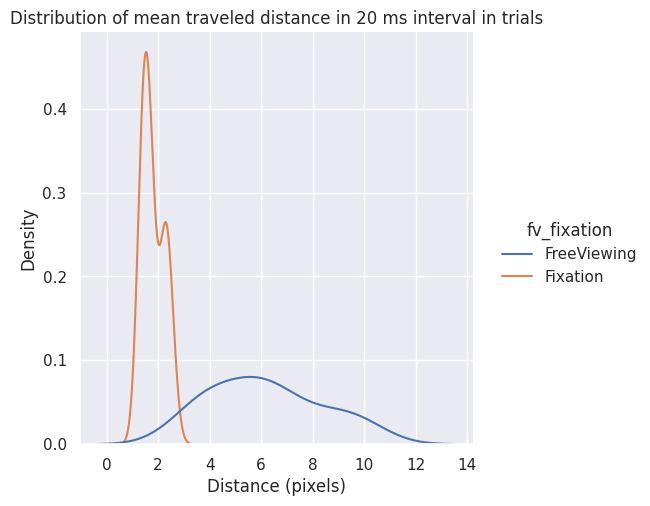

In [17]:
# Plot the distribution of dista
g = sns.displot(
        data=hyp1_var_avg_x_y,
        x='avg_distance',
        hue='fv_fixation',
        kind="kde",
   )

g.set_axis_labels("Distance (pixels)")
plt.title("Distribution of mean traveled distance in 20 ms interval in trials")

The distributions above looks roughly like normal distribution, so we can use the paired t-test:

In [18]:
# Run t-test:
stats.ttest_rel(
    hyp1_var_avg_x_y[(hyp1_var_avg_x_y.fv_fixation == "FreeViewing")].avg_distance,
    hyp1_var_avg_x_y[(hyp1_var_avg_x_y.fv_fixation == "Fixation")].avg_distance,
)

Ttest_relResult(statistic=7.553155546087788, pvalue=2.6562601597399225e-06)

Resulting p-value fom the paired t-test is `p = 2.656e-06`. Using the significance level $\alpha = 0.05$ we reject the null hypothesis $H_0$, meaning that the trajecories of the eye movement differ between `FreeViewing` and `Fixation` tasks for `Blank` task type for participant `009`.

### Discusion

We have rejected the null hypothesis $H_0$. The reason of this result could be that participant during the `FreeViewing` task randomly moves their focus between several arbitrary points in the blank picture. In contrast in `Fixation` task they tried to focus on the fixed point. The distribution of the mean distance of the eye focus above also supports this idea. It shows that during `FreeViewing` task the distribution of the traveled distance had higher variance and its mean was also significantly higher than in `Fixation` task.

For better understanding of the different behaviour between `FreeViewing` and `Fixation`. In the future work we could compare the results of the other task types between each other. These results could be for example used to determine the difference between trajectories of puzzle solving tasks and `Natural` and `Blank` tasks or to determine how the focus of the participants differ in `Fixation` task for diferent task types. The hypothesis testing above could be also improved by filtering errorous movements from the data instead of computing the mean of the intervals.

## Hypothesis 2:
### "There will be difference in pupil size based on the task and it will also depend on the time elapsed since the start of the experiment".

The motivation to test this hypothesis is the correlation between pupil size and excitement of the participant. During `Blank` the participant probably will not be very excited and the average pupil size would be relatively small. It is hard to determine the behaviour during the task type `Natural`, because pupil size could depend on the specific picture (if it is interesting or not). In the tasks `Puzzle` and `Waldo`, we expect that pupil size would depend on the succes of solving the task. Additionaly, we expect that excitement of the participants will decline in time so as the pupil size.

In order to test hypothesis above we decided to compare the average pupil size between the task `Blank` and other types of tasks.

### Data Preparation

In order to test the hypothesis we extracted data from only one arbitrary choosen participant with ID `059` (because of usage of t-test). We also extracted only data from `FreeViewing` task, because `Fixation` task is not relevant in terms of testing of our hypothesis. 

We extracted and renamed the following columns:
* `time` - Time in milliseconds from the begining of the trial (normalized from the absolute values to relative (starts from 0).
* `trial` - ID of the trial.
* `task` - Type of the task.
* `lp` - Size of the left pupil. We arbitrary selected the left pupil size as simplification of the problem, because we expect that the size will change synchronously on the left and on the right.

In [19]:
# We choose only subject `059` and `FreeViewing` task.
hyp2_var = load_data(subject="059", fv_fixation="FreeViewing")

In [20]:
hyp2_var.head()

,participant_id,trial_id,fv_fixation,task_type,stimulus_id,Time,LXpix,LYpix,RXpix,RYpix,LXhref,LYhref,RXhref,RYhref,LP,RP
0,059,001,FreeViewing,Natural,nat009,952510,450.50,224.700,458.10,191.550,-1601.0,4313.0,-1494.0,3939.0,2327,2158
1,059,001,FreeViewing,Natural,nat009,952512,450.58,223.650,457.22,197.100,-1600.0,4300.0,-1508.0,4001.0,2334,2223
2,059,001,FreeViewing,Natural,nat009,952514,450.66,224.325,459.78,198.525,-1600.0,4308.0,-1482.0,4019.0,2344,2224
3,059,001,FreeViewing,Natural,nat009,952516,450.34,223.425,458.74,198.300,-1602.0,4297.0,-1493.0,4016.0,2325,2246
4,059,001,FreeViewing,Natural,nat009,952518,449.70,223.500,457.86,199.200,-1608.0,4297.0,-1502.0,4025.0,2325,2247


In [21]:
# Rename the parameters.
hyp2_var = hyp2_var.rename(
        {
            "Time": "time",
            "trial_id": "trial",
            "task_type": "task",
            "LP": "lp",
        },
        axis = 1
    )

# Get only necessary parameters. Choose only left pupil.
hyp2_var = hyp2_var\
    [
        [
            "time",
            "trial",
            "task",
            "lp",
        ]
    ]

# Normalize time to always start from the 0.
hyp2_var["time"] = hyp2_var\
    .groupby("trial")["time"]\
    .transform(lambda x: x - x.min())

#### Blinks Removal

Because we wanted to analyze the change of the pupil size we had to somehow deal with the blinks of the respondent. Because of that prepared function to remove the blink candidates from the dataset. Firstly, we have to detect the blinks. For this problem we used the lower estimate of the average human pupil size which is 2 mm 
\[[1](https://www.ncbi.nlm.nih.gov/books/NBK381/)\]. To ensure that we will not reduce large number of the correct data from the participant with small pupil size, we detected blink when the pupil size is less than 1 mm (half of the bottom average estimate). We also used the estimation of blink duration from 
\[[2](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4043155/#RSIF20130227C2)\], which states that blink duration is approximately $1/3$ s. Based on that estimation we removed 160 ms interval before and after the detected blink peak to remove the data affected by the blink.

This preprocessing could also help with removing erroneous pupil size data. The implementation of the function to remove blinks is in the code blocks below.

In [22]:
def remove_blinks(
        data : pd.DataFrame,
        pupil_column='lp',
        blink_treshold=100, 
        blink_duration=80,  # Remove 160 ms before and after blink.
    ):
    """
    Removes all blink candidates and their adjacent interval from the data.
    """
    
    new_data = data.copy()
    num_rows = new_data.shape[0]
    
    # Find all time candidates for the blink (lower than `blink_treshold`).
    blink_peaks = np.where(new_data[pupil_column].lt(blink_treshold))[0]
    for peak in blink_peaks:
        # For each blink candidate get rid of the data around the blink
        # (to eliminate whole blinking interval).
        new_data\
            .loc[
                max(0, peak - blink_duration):
                    min(peak + blink_duration, num_rows),
                pupil_column
            ] = pd.NA
    
    return new_data.dropna()

In [23]:
def plot_blinks(
        data: pd.DataFrame,
        trial_id,
    ):
    """
    Plots the left pupil size in time for the choosen trial before and after blink removal.
    """
    before = data[data.trial == trial_id].assign(blinks_removed='No')
    after = remove_blinks(before).assign(blinks_removed='Yes')
    combined_data = pd.concat([before, after])

    g = sns.relplot(
        data=combined_data, 
        x='time',
        y='lp',
        kind='line',
        row='blinks_removed',
        aspect=3
    )
    g.set_xlabels("Time (ms)")
    g.set_ylabels("Pupil size")
    g.axes[0, 0].set_title(f"Original pupil size :trial {trial_id}")
    g.axes[1, 0].set_title(f"Pupil size with blinks removed :trial {trial_id}")

The first plot below shows the left pupil size in the time for the trial `045`. The second plot shows the same data after removing the blink candidates. It is easy to estimate from the plot where the blinks probably happened. When we compare the data before and after pre-processing we can say that the function for removing blinks worked fairly well. We have choosen the trial `045`, because it is an example with large number of the blink candidates and nicely ilustrates the function of the pre-processing (but we can also see some blink candidates which were probably erroneously left in the data).

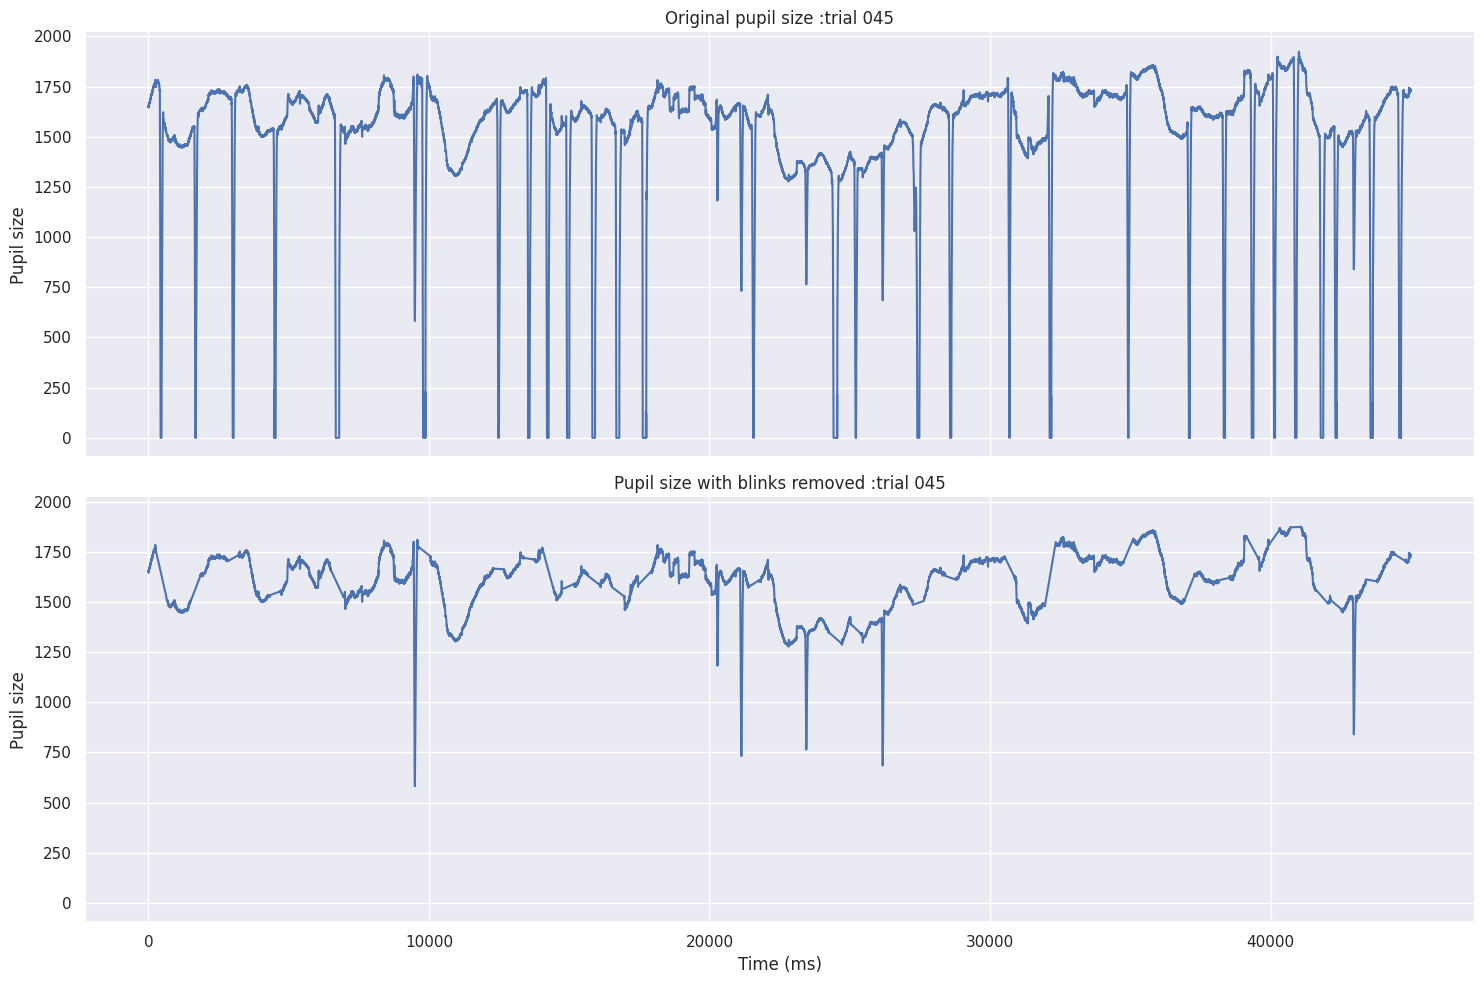

In [24]:
plot_blinks(hyp2_var, "045")

The following code blocks shows the final pre-processing of the data. We removed the blinks for each trial, then computed mean of the left pupil size for each trial and finaly removed `trial` column.

In [25]:
# Remove blinks and compute mean left pupil size for each trial.
hyp2_var_avg_pupil = hyp2_var\
    .groupby("trial")\
    .apply(remove_blinks)\
    .reset_index(drop=True)\
    .groupby(["trial", "task"])\
    .agg(avg_lp=("lp", np.mean))\
    .reset_index()\
    .drop("trial", axis=1)

In [26]:
hyp2_var_avg_pupil.head()

,task,avg_lp
0,Natural,1755.973668
1,Puzzle,2098.998261
2,Puzzle,1971.509708
3,Blank,1511.975890
4,Puzzle,1654.727015


### Hypothesis Testing

First, define the null and alternative hypotheses (in fact we want to test 3 variants for each alternative task type). State $\mu_0$ to be mean of left pupil size for `Blank` task type and $\mu_t$ to be mean left pupil size for one of the other types. Note that $t$ specifies the task type (so we have 3 different variants of $\mu_t$ for each alternative task type.

* $H_0$ (null hypothesis): $\mu_0 = \mu_t$ 
* $H_1$ (alternative hypothesis): $\mu_0 \neq \mu_t$ 

We first compute the summary statistics for the mean left pupil size `avg_lp` for each task type.

In [27]:
hyp2_var_avg_pupil.groupby("task").describe().round(decimals=2)

avg_lp                                                              
         count     mean     std      min      25%      50%      75%      max
task                                                                        
Blank     15.0  1301.41  240.46   909.63  1153.67  1286.39  1433.16  1832.80
Natural   15.0  1630.13  197.86  1127.36  1544.63  1602.10  1763.40  1937.58
Puzzle    15.0  1756.54  199.33  1398.00  1626.31  1755.27  1871.95  2099.00
Waldo     15.0  1617.98  146.14  1367.17  1504.26  1636.79  1717.40  1891.75

Then, we look at the distribution of the mean left pupil size for each task type. We can see that it roughly looks like normal distribution, so the assumption for t-test is probably fulfilled.

The plots of the distributions could be seen in the code blocks below.

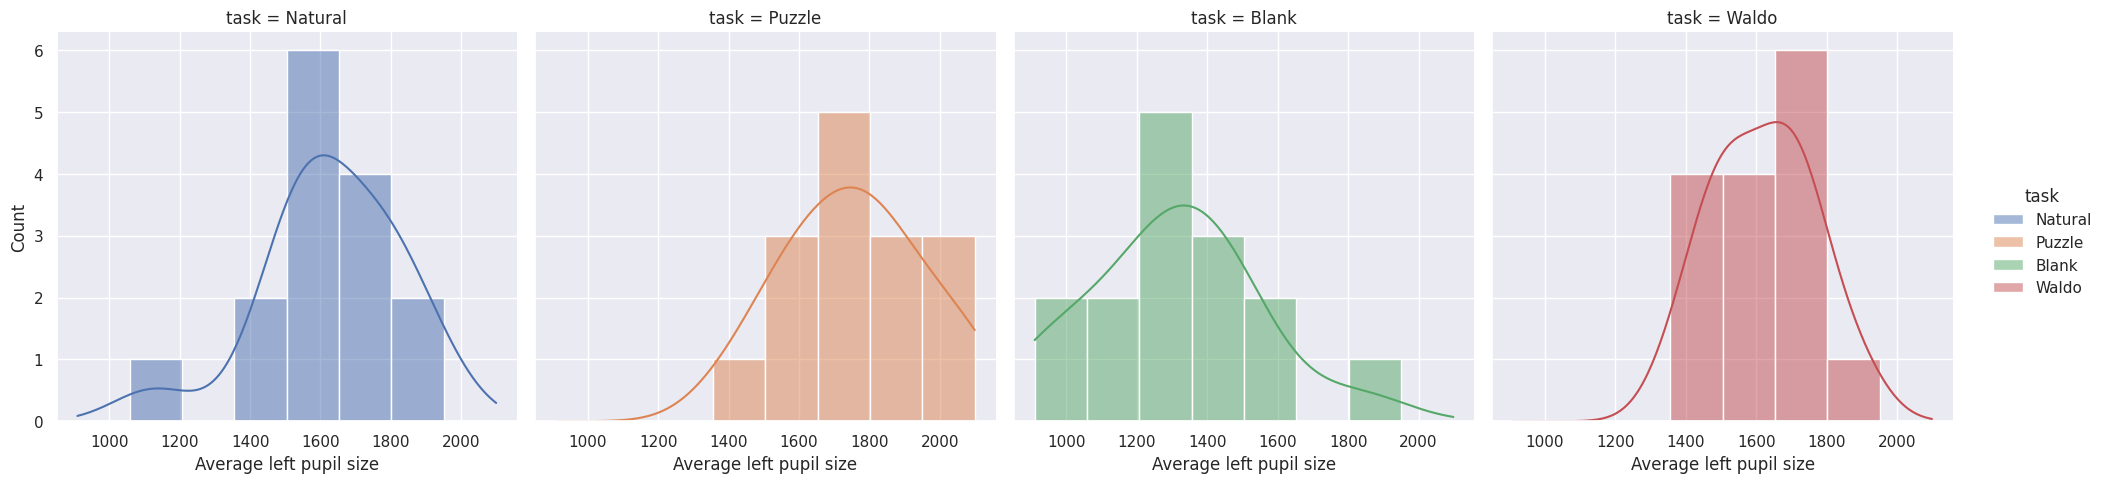

In [28]:
# Plot the `avg_lp` for each task.
g = sns.displot(
    data=hyp2_var_avg_pupil,
    x='avg_lp',
    hue='task',
    col="task",
    kde=True,
    )

g.set_xlabels("Average left pupil size")
g.set_ylabels("Count")

The assumptions of the t-test are that the random variables should be independent and that their distribution should be normal. The independence is fulfilled because we have choosen only data from one participant. As we have stated above the assumption of distribution is probably fulfilled based on the ploted results. Though, we are not hundred percent sure about the statement, so we decided to test the results also with Wilcoxon rank sum test. This test is non-parametric analogy of t-test which does not assume anything specific about the distribution. 

We performed paired t-test and Wilcoxon rank sum test for each pair of `Blank` and alternative task type on `avg_lp` values.

In [29]:
# Perform t-tests and Wilcoxin rank sum tests:
for alt_task in ["Natural", "Puzzle", "Waldo"]:
    ttest_result = stats.ttest_rel(
        hyp2_var_avg_pupil[hyp2_var_avg_pupil.task == "Blank"].avg_lp,
        hyp2_var_avg_pupil[hyp2_var_avg_pupil.task == alt_task].avg_lp,
    )
    
    wilcoxon_result = stats.ranksums(hyp2_var_avg_pupil[hyp2_var_avg_pupil.task == "Blank"].avg_lp,
        hyp2_var_avg_pupil[hyp2_var_avg_pupil.task == alt_task].avg_lp
        )
    
    print(f"Results for the paired t-test for the alternative task type '{alt_task}' are: {ttest_result}")
    print(f"Results for the Wilcoxon rank sum test for the alternative task type '{alt_task}' are: {wilcoxon_result}")
    print()

Results for the paired t-test for the alternative task type 'Natural' are: Ttest_relResult(statistic=-4.296009019122196, pvalue=0.0007392300421336361)
Results for the Wilcoxon rank sum test for the alternative task type 'Natural' are: RanksumsResult(statistic=-3.5048967281888372, pvalue=0.00045678443326107037)

Results for the paired t-test for the alternative task type 'Puzzle' are: Ttest_relResult(statistic=-7.094285178256108, pvalue=5.385082398716744e-06)
Results for the Wilcoxon rank sum test for the alternative task type 'Puzzle' are: RanksumsResult(statistic=-4.085589677237875, pvalue=4.3965015355347056e-05)

Results for the paired t-test for the alternative task type 'Waldo' are: Ttest_relResult(statistic=-4.955580613728317, pvalue=0.00021124301829198586)
Results for the Wilcoxon rank sum test for the alternative task type 'Waldo' are: RanksumsResult(statistic=-3.5463747959780543, pvalue=0.0003905702877707525)



Resulting p-values for different alternative task types for paired t-test are:

```
    Natural: 0.000739
    Puzzle: 5.385e-06
    Waldo: 0.000211
```

And for the Wilcoxon rank sum test:

```
    Natural: 0.000457
    Puzzle: 4.397e-05
    Waldo: 0.000391
```

Using the significance level $\alpha = 0.05$ we reject the null hypothesis $H_0$ for all variants of alternative task types (`Natural`, `Puzzle`, `Waldo`) for both paired t-test and Wilcoxon rank sum test. The mean pupil size $\mu_0$ in `Blank` task type will differ with all other means $\mu_t$ for alternative taks types in `FreeViewing` task and participant `059`.

### Discusion

#### Different Pupil Size in Time

The original hypothesis stated that the pupil size will also differ in time. Unfortunately we do not have time to test this part of the hypothesis deeply. At least, we prepared the plots of left pupil size in time for the arbitrary selected trials `032`, `037`, `038` and `039` of participant `059` with blinks removed from the data. Each trial represent different task type.

Based on the plots we can assume that during the `Blank` task the participants were the least excited which led to roughly constantly small pupil size in time. Surprisingly the most similar curves of the pupil size in time were for `Natural` and `Waldo` task types. Although, we can see some peaks in pupil size in `Waldo` task, which could be the moment when the participant found the Waldo. For the `Puzzle` task type we can see that there are significant peaks in the pupil size. This peaks could be the moments when participant found the difference between pictures.

It is important to state that these ideas are based only on the observations of the plots of one representative for each task type, thus could be badly interpreted. The code and plots mentioned above are in the following code blocks. 

Text(0.5, 1.0, 'Pupil Size Over Time (all task types together)')

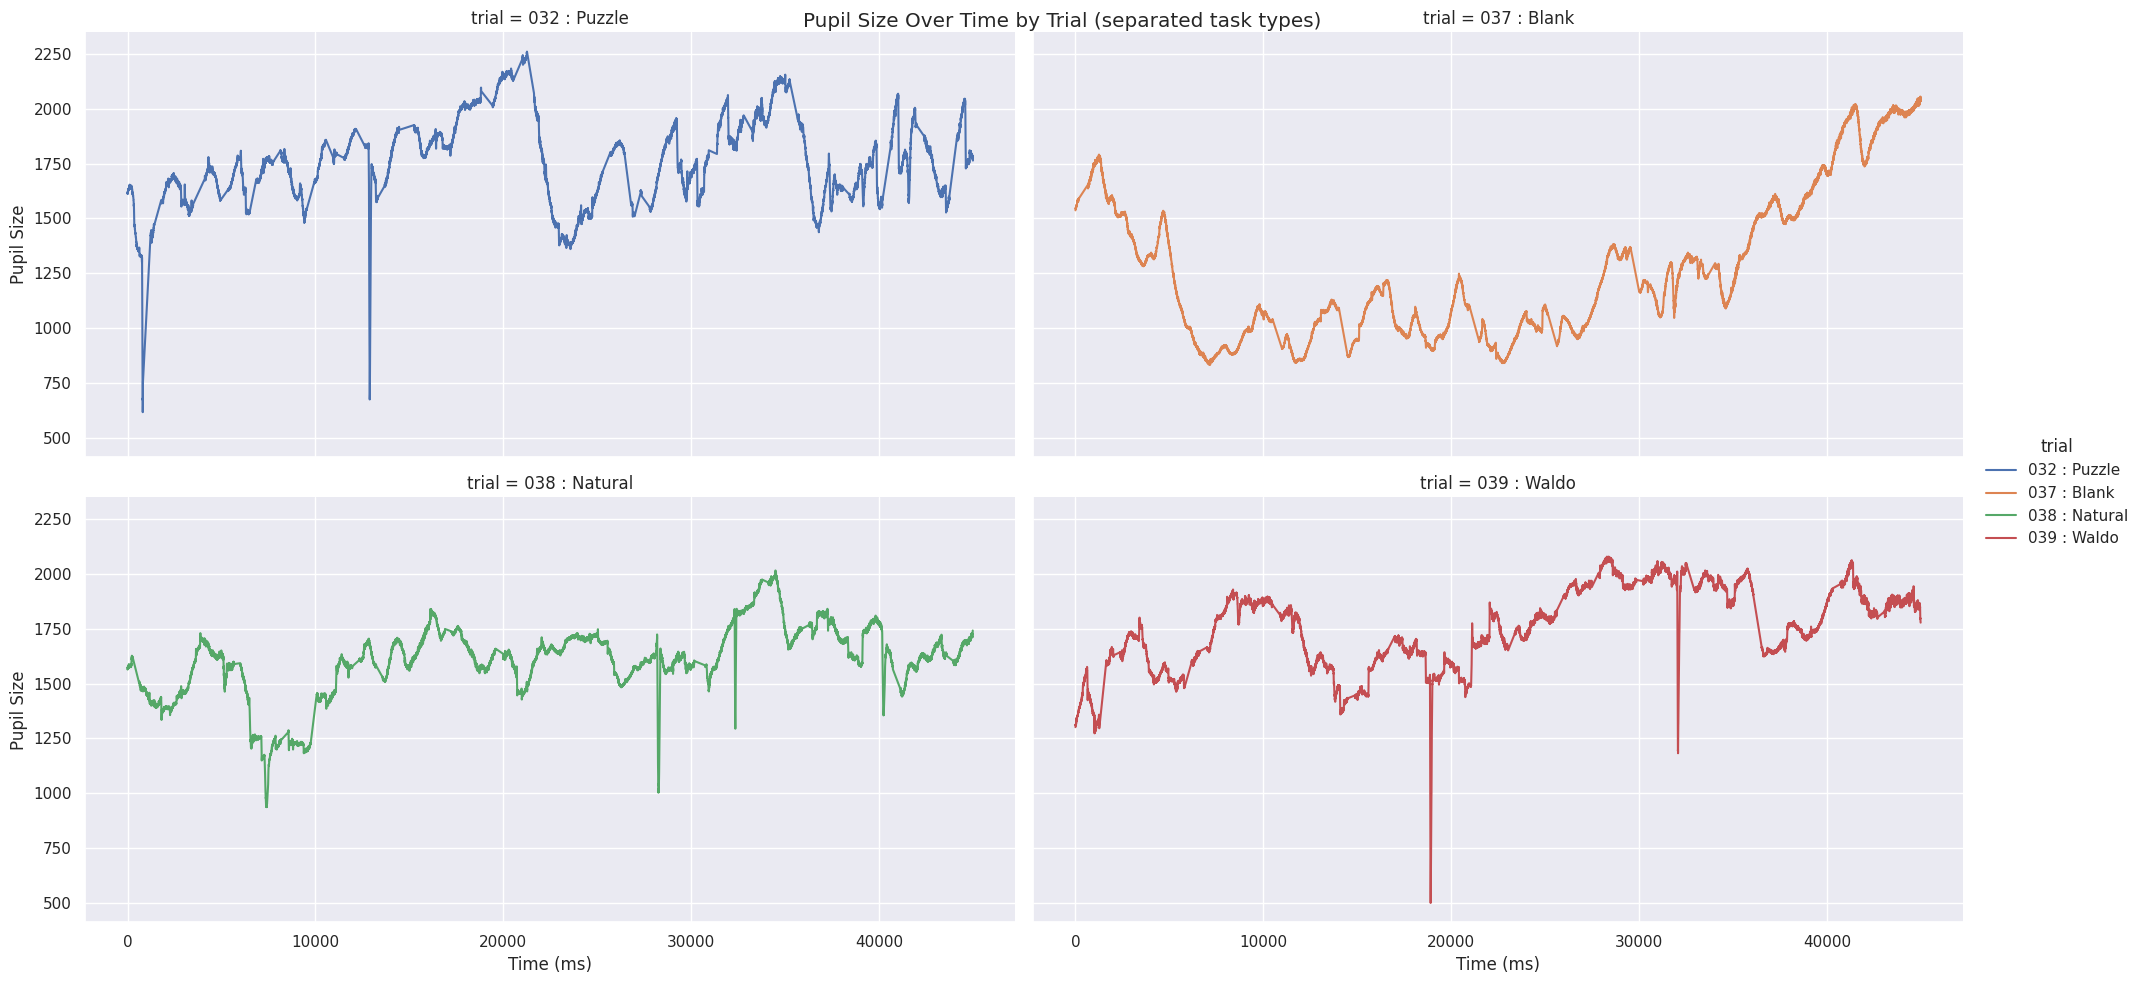

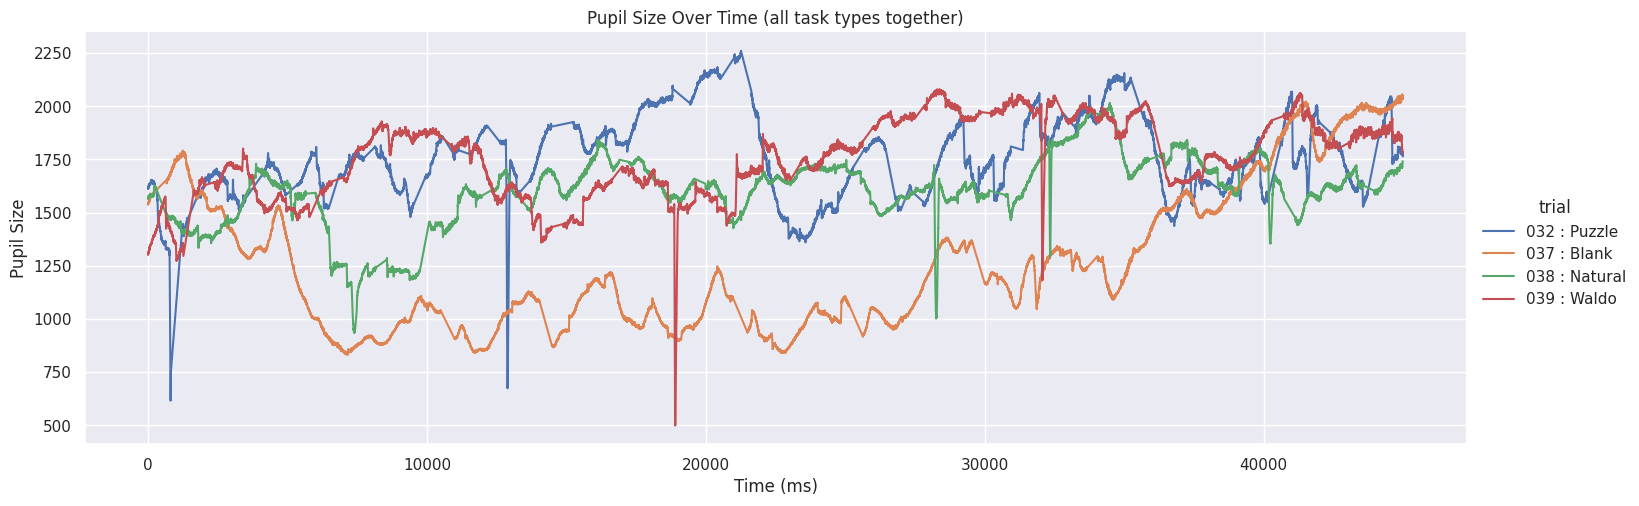

In [30]:
# Plot pupil size in time for randomly choosen trials for each task type:

trial_types = {
    "032": "Puzzle",
    "037": "Blank",
    "038": "Natural",
    "039": "Waldo"
}

# Filter data for the specified trials and remove blinks.
before = hyp2_var[hyp2_var.trial.isin(trial_types.keys())]
after = before.groupby("trial").apply(remove_blinks).reset_index(drop=True)

# Create labels for the plots.
after["task_type"] = after["trial"].map(trial_types).astype(str)

# Rename the trials to "{trial_number} : {task_type}" (for plotting).
after["trial"] = after["trial"] + " : " + after["task_type"]

# Plot the data:

# Each task type in separate plot.
g = sns.relplot(data=after, x="time", y="lp", kind="line", col="trial", hue="trial", col_wrap=2, aspect=2)
g.set_axis_labels("Time (ms)", "Pupil Size")
g.fig.suptitle("Pupil Size Over Time by Trial (separated task types)")

# All task types in one plot.
g = sns.relplot(data=after, x="time", y="lp", kind="line", hue="trial", aspect=3)
g.set_axis_labels("Time (ms)", "Pupil Size")
plt.title("Pupil Size Over Time (all task types together)")

#### Discusion of the Hypothesis Testing

We have rejected the null hypothesis $H_0$ for all variants of the task types. The reason of this result could be that participant during `Blank` task type is mainly bored and its pupil size is then small. This idea is also supported by the observations of pupil size in time which shows that the pupil size in `Blank` task type was the smallest between the choosen representatives of each task type. On the other hand, we the participants are probably more excited while solving some problem like in `Puzzle` or `Waldo` tasks or while looking around the picture (`Natural` task).

Finally, we have to state that the results were tested only on the data from one participant and the results for the more diverse sample of participants could differ. In future work it might be appropriate to test the results on the whole set of participants and more deeply explore the relationship between each task type and pupil size in time.